## **Import dependency**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Read the data set:**

In [2]:
df=pd.read_csv("titanic.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# columns to drop

columns_to_drop = ['passengerid','name','ticket','cabin']


In [6]:
def clean_data(df):
    return (
        df
        .rename(columns=str.lower)
        .drop(columns=columns_to_drop)
        .assign(
            family = lambda df_ : df_['sibsp'] + df_['parch']
        )
        .drop(columns=['sibsp','parch'])

    )



final=df.pipe(clean_data)

In [7]:
final

,survived,pclass,sex,age,fare,embarked,family
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,0
887,1,1,female,19.0,30.0000,S,0
888,0,3,female,NaN,23.4500,S,3
889,1,1,male,26.0,30.0000,C,0


In [8]:
final.duplicated().sum()

112

In [9]:
final=final.drop_duplicates(keep="first")

In [10]:
final.duplicated().sum()

0

In [11]:
final.isna().sum()

survived      0
pclass        0
sex           0
age         103
fare          0
embarked      2
family        0
dtype: int64

In [12]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 779 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  779 non-null    int64  
 1   pclass    779 non-null    int64  
 2   sex       779 non-null    object 
 3   age       676 non-null    float64
 4   fare      779 non-null    float64
 5   embarked  777 non-null    object 
 6   family    779 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 48.7+ KB


## **EDA**

In [13]:
# distribution of target

(
    final
    .loc[:,'survived']
    .value_counts(normalize=True)
)

survived
0    0.587933
1    0.412067
Name: proportion, dtype: float64

In [14]:
final.select_dtypes(include=['object']).describe()

,sex,embarked
count,779,777
unique,2,3
top,male,S
freq,488,565


In [15]:
final

,survived,pclass,sex,age,fare,embarked,family
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0
...,...,...,...,...,...,...,...
885,0,3,female,39.0,29.1250,Q,5
887,1,1,female,19.0,30.0000,S,0
888,0,3,female,NaN,23.4500,S,3
889,1,1,male,26.0,30.0000,C,0


## **Boxplot for `age`,`fare` & `family`**

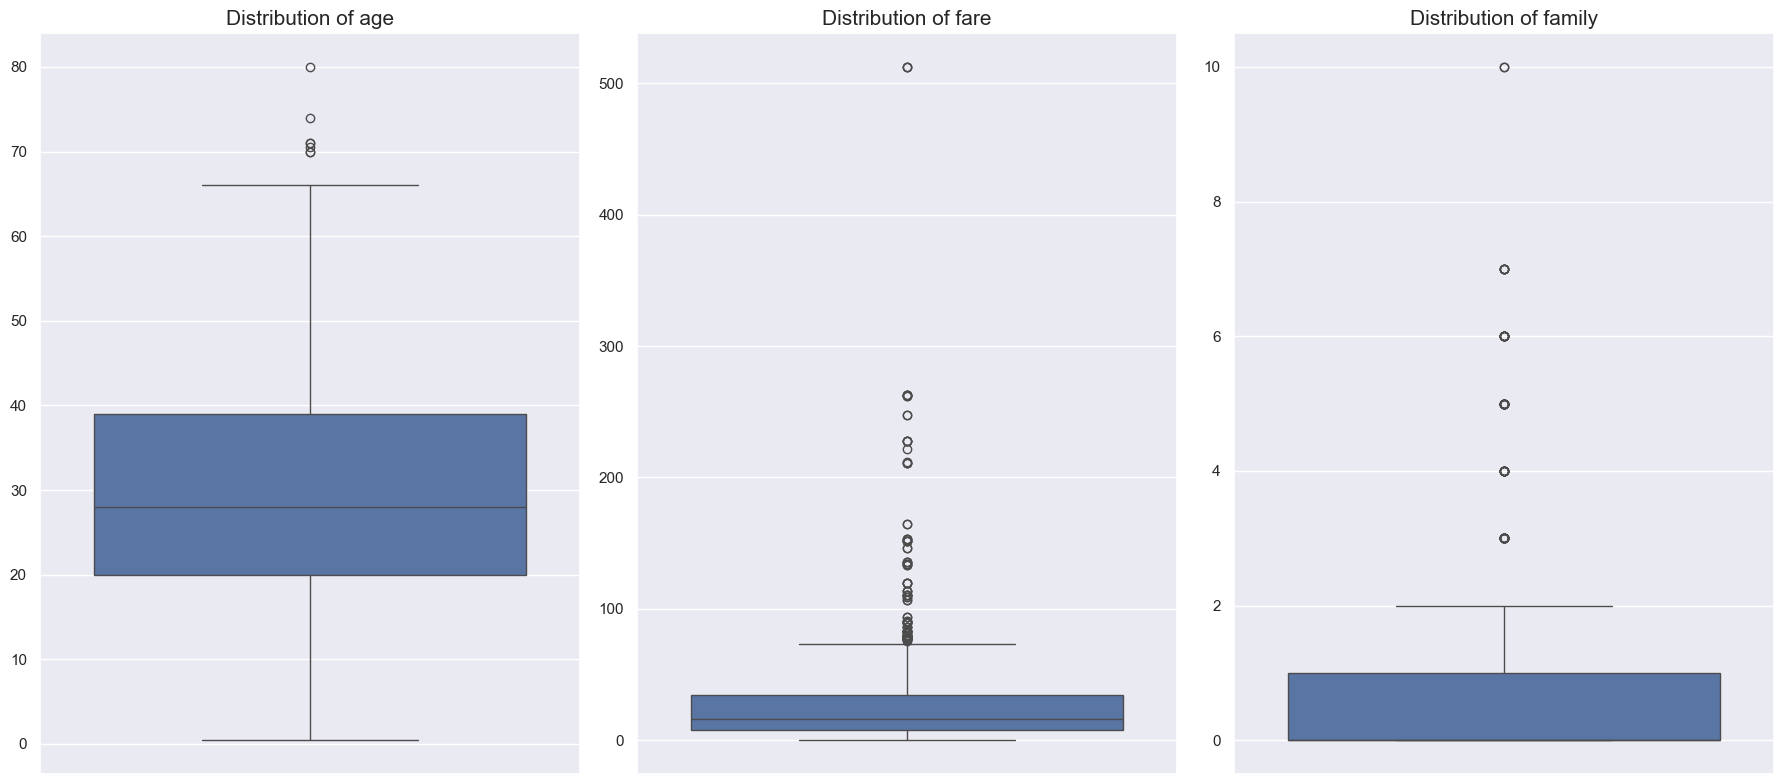

In [16]:
def plot_boxplots(df):
    numeric_cols =["age","fare","family"]
    n_cols=3 
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # Ensure enough rows to fit all plots
    plt.figure(figsize=(n_cols * 6, 8 * n_rows))
    sns.set(style="darkgrid")
    for i, col in enumerate(numeric_cols):
        plt.subplot(n_rows, n_cols, i+1)
        sns.boxplot(data=df, y=col)
        plt.title(f'Distribution of {col}', fontsize=15)
        plt.ylabel('')
    plt.tight_layout()
    plt.show()

final.pipe(plot_boxplots)

## **Countplot for `gender` & `embarked`**

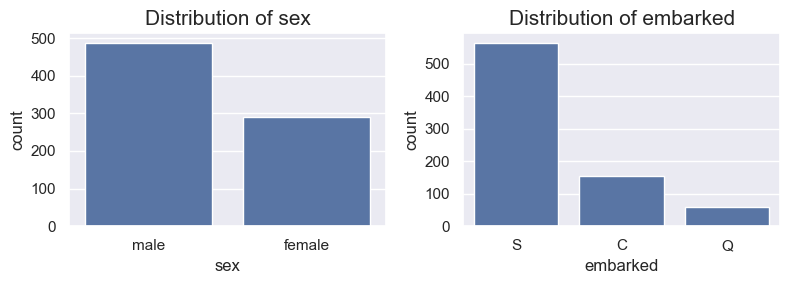

In [17]:
def count_plot(df):
    # Select columns with object data type (categorical columns)
    obj_cols = df.select_dtypes("object").columns
    
    # Calculate the number of rows and columns for subplots
    n_cols=3 
    n_rows = (len(obj_cols) + n_cols - 1) // n_cols  # Ensure enough rows to fit all plots    
    # Limit the figure size to avoid exceeding max size
    plt.figure(figsize=(n_cols * 4,3  * n_rows))
    
    # Loop through the categorical columns to create boxplots
    for i, col in enumerate(obj_cols):
        # Create a subplot for each boxplot
        plt.subplot(n_rows, n_cols, i + 1)
        
        # Create a countplot for each categorical column (since boxplots are for numerical data)
        sns.countplot(data=df, x=col)
        
        # Set title for each subplot
        plt.title(f'Distribution of {col}', fontsize=15)
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Show the plots
    plt.show()

final.pipe(count_plot)


## **feature engineering:**

In [18]:
! pip install feature_engine --q

In [19]:
x= final.drop(columns="survived")
y=final.survived

In [20]:
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.ensemble import RandomForestClassifier

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder
)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from feature_engine.encoding import CountFrequencyEncoder
from feature_engine.outliers.winsorizer import Winsorizer



In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
print('The shape of training data is',x_train.shape)
print('The shape of testing data is',x_test.shape)

The shape of training data is (623, 6)
The shape of testing data is (156, 6)


## **Pipelines for Individual Columns**


In [22]:
x.columns

Index(['pclass', 'sex', 'age', 'fare', 'embarked', 'family'], dtype='object')

In [23]:
# age_pipeline
age_pipe = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='median')),
    ('outliers',Winsorizer(capping_method='gaussian',fold=3)),
    ('scale',StandardScaler())
])


age_pipe

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('outliers', Winsorizer(fold=3)), ('scale', StandardScaler())])

In [24]:
# embarked_pipeline
embarked_pipe= Pipeline(steps=[("impute",SimpleImputer(strategy="most_frequent")),
                             ('count_encode',CountFrequencyEncoder(encoding_method='count')),
                             ("scale",MinMaxScaler())
                             
])
embarked_pipe

Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                ('count_encode', CountFrequencyEncoder()),
                ('scale', MinMaxScaler())])

In [25]:
# fare_pipeline
fare_pipe=Pipeline(steps=[
    ('outliers',Winsorizer(capping_method='iqr',fold=1.5)),
    ("scale",StandardScaler())
])
fare_pipe

Pipeline(steps=[('outliers', Winsorizer(capping_method='iqr', fold=1.5)),
                ('scale', StandardScaler())])

## **Column Transformer:**

In [26]:
set_config(transform_output='pandas')

In [27]:
x.head(2)


,pclass,sex,age,fare,embarked,family
0,3,male,22.0,7.2500,S,1
1,1,female,38.0,71.2833,C,1


In [28]:
# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("age", age_pipe, ["age"]),
        ("fare", fare_pipe, ["fare"]),
        ("embarked_", embarked_pipe, ["embarked"]),
        ("sex", OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ["sex"]),
        ("family", MinMaxScaler(), ["family"])
    ],
    remainder="passthrough",  # Any columns not listed will pass through without modification
    n_jobs=-1,  # Number of jobs to run in parallel (set to -1 to use all cores)
)
preprocessor

ColumnTransformer(n_jobs=-1, remainder='passthrough',
                  transformers=[('age',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('outliers',
                                                  Winsorizer(fold=3)),
                                                 ('scale', StandardScaler())]),
                                 ['age']),
                                ('fare',
                                 Pipeline(steps=[('outliers',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5)),
                                                 ('scale', StandardScaler())]),
                                 ['fare']),
                                ('embarked_',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('count_encode',
                                                  CountFrequencyEncoder()),
                                                 ('scale', MinMaxScaler())]),
                                 ['embarked']),
                                ('sex',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['sex']),
                                ('family', MinMaxScaler(), ['family'])])

In [29]:
# fit and transform the training data

preprocessor.fit_transform(x_train)


,age__age,fare__fare,embarked___embarked,sex__sex_female,sex__sex_male,family__family,remainder__pclass
789,1.133411,2.071412,0.191646,0.0,1.0,0.0,1
723,1.418317,-0.608225,1.000000,0.0,1.0,0.0,2
141,-0.576021,-0.829161,1.000000,1.0,0.0,0.0,3
388,-0.077437,-0.830037,0.000000,0.0,1.0,0.0,3
56,-0.647248,-0.713433,1.000000,1.0,0.0,0.0,2
...,...,...,...,...,...,...,...
72,-0.647248,1.937798,1.000000,0.0,1.0,0.0,2
112,-0.576021,-0.816536,1.000000,0.0,1.0,0.0,3
287,-0.576021,-0.823026,1.000000,0.0,1.0,0.0,3
483,2.344259,-0.751834,1.000000,1.0,0.0,0.0,3


In [30]:
display(preprocessor.get_params())


{'n_jobs': -1,
 'remainder': 'passthrough',
 'sparse_threshold': 0.3,
 'transformer_weights': None,
 'transformers': [('age',
   Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                   ('outliers', Winsorizer(fold=3)), ('scale', StandardScaler())]),
   ['age']),
  ('fare',
   Pipeline(steps=[('outliers', Winsorizer(capping_method='iqr', fold=1.5)),
                   ('scale', StandardScaler())]),
   ['fare']),
  ('embarked_',
   Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                   ('count_encode', CountFrequencyEncoder()),
                   ('scale', MinMaxScaler())]),
   ['embarked']),
  ('sex',
   OneHotEncoder(handle_unknown='ignore', sparse_output=False),
   ['sex']),
  ('family', MinMaxScaler(), ['family'])],
 'verbose': False,
 'verbose_feature_names_out': True,
 'age': Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                 ('outliers', Winsorizer(fold=3)), ('scale', StandardScaler())]),
 'fare'

In [31]:
model_params=RandomForestClassifier().get_params()
model_params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [32]:
model_pipe = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('clf',RandomForestClassifier(**model_params))
])

model_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('age',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('outliers',
                                                                   Winsorizer(fold=3)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['age']),
                                                 ('fare',
                                                  Pipeline(steps=[('outliers',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['fare']),
                                                 ('embarked_',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('count_encode',
                                                                   CountFrequencyEncoder()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['embarked']),
                                                 ('sex',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['sex']),
                                                 ('family', MinMaxScaler(),
                                                  ['family'])])),
                ('clf', RandomForestClassifier())])

In [33]:
# fit the model on the training data

model=model_pipe.fit(x_train,y_train)
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('age',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('outliers',
                                                                   Winsorizer(fold=3)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['age']),
                                                 ('fare',
                                                  Pipeline(steps=[('outliers',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['fare']),
                                                 ('embarked_',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('count_encode',
                                                                   CountFrequencyEncoder()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['embarked']),
                                                 ('sex',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['sex']),
                                                 ('family', MinMaxScaler(),
                                                  ['family'])])),
                ('clf', RandomForestClassifier())])

In [34]:
# evaluate the model on the test data

y_pred = model_pipe.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred).item()
recall = recall_score(y_test,y_pred).item()
f1 = f1_score(y_test,y_pred).item()

In [35]:
# metrics dict

metrics = {
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1
}

metrics

{'accuracy': 0.7884615384615384,
 'precision': 0.7586206896551724,
 'recall': 0.6984126984126984,
 'f1_score': 0.7272727272727273}

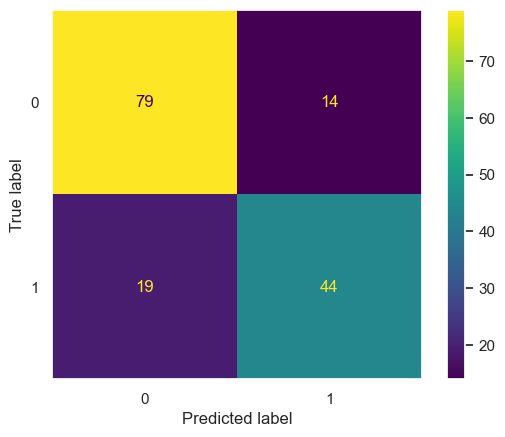

In [36]:
# plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix



cm = ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
cm.ax_.grid(False)

In [37]:
!pip install mlflow --q

In [38]:
import mlflow

In [47]:
x_test.join(y_test)

,pclass,sex,age,fare,embarked,family,survived
677,3,female,18.0,9.8417,S,0,1
668,3,male,43.0,8.0500,S,0,0
615,2,female,24.0,65.0000,S,3,1
729,3,female,25.0,7.9250,S,1,0
546,2,female,19.0,26.0000,S,1,1
...,...,...,...,...,...,...,...
382,3,male,32.0,7.9250,S,0,0
82,3,female,NaN,7.7875,Q,0,1
156,3,female,16.0,7.7333,Q,0,1
362,3,female,45.0,14.4542,C,1,0


In [53]:
import mlflow
import mlflow.sklearn

# Set the URI for the server
mlflow.set_tracking_uri("http://127.0.0.1:5000")

# Set the experiment
mlflow.set_experiment("exp1")

with mlflow.start_run() as run:
    # Log the data signature
    data_signature = mlflow.models.infer_signature(
        model_input=x_train, model_output=model_pipe.predict(x_train)
    )

    # Log preprocessor parameters
    mlflow.log_params(model_pipe.get_params())

    # Log model metrics
    metrics = {"accuracy": accuracy_score(y_test, model_pipe.predict(x_test))}
    mlflow.log_metrics(metrics)

    # Log the model
    mlflow.sklearn.log_model(sk_model=model_pipe, artifact_path="model", signature=data_signature,registered_model_name="titanic_survival")

    # Log the dataset as an artifact
    x_train.to_csv("x_train.csv", index=False)
    x_test.to_csv("x_test.csv",index=False)

    y_train.to_csv("y_train.csv", index=False)
    y_test.to_csv("y_test.csv", index=False)
    
    mlflow.log_artifact("x_train.csv", artifact_path="data/training")
    mlflow.log_artifact("y_train.csv", artifact_path="data/training")
    mlflow.log_artifact("x_test.csv", artifact_path="data/test")
    mlflow.log_artifact("y_test.csv", artifact_path="data/test")


    # Get the model URI
    model_uri = mlflow.get_artifact_uri("model")

    # Evaluate the model
    evaluations = mlflow.models.evaluate(
        model=model_uri,
        data=x_test.assign(survived=y_test),
        targets="survived",
        model_type="classifier",
    )

    # Log the confusion matrix
    cm = ConfusionMatrixDisplay.from_estimator(model_pipe, x_test, y_test)
    cm.figure_.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png", artifact_path="figures")


RestException: INVALID_PARAMETER_VALUE: Invalid experiment ID: '.ipynb_checkpoints'

In [ ]:
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the params for RF model
max_depth = 10
n_estimators = 5
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("uma")

with mlflow.start_run():
    model_pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('clf', RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators, random_state=42))
    ])
    
    model_pipe.fit(x_train, y_train)
    y_pred = model_pipe.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)

    mlflow.log_metric('accuracy', accuracy)
    mlflow.log_param('max_depth', max_depth)
    mlflow.log_param('n_estimators', n_estimators)

    # Creating a confusion matrix plot
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,6))
    class_labels = ["Not Survived", "Survived"]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')

    # Save plot
    plt.savefig("Confusion-matrix.png")

    # Log artifacts using mlflow
    mlflow.log_artifact("Confusion-matrix.png")
    
    #save the code
   # mlflow.log_artifact(notebook_path)


    # Tags
    mlflow.set_tags({"Author": 'santosh', "Project": "Titanic survival"})

    # Log the model
    mlflow.sklearn.log_model(model_pipe, "Random-Forest-Model")

    print(accuracy)
